In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds


In [41]:
# Load MNIST dataset
mnist_data = tfds.load("mnist")
mnist_train, mnist_test = mnist_data["train"], mnist_data["test"]

# Preprocess function to normalize images
def preprocess(example):
    image = tf.cast(example["image"], tf.float32) / 255.0  # Normalize to [0, 1]
    label = example["label"]
    return image, label

# Apply preprocessing, shuffle, and batch the datasets
mnist_train = mnist_train.map(preprocess).shuffle(1000).batch(100)
mnist_test = mnist_test.map(preprocess).batch(100)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
model.fit(mnist_train, epochs=5, validation_data=mnist_test)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(mnist_test)
print(f"Test accuracy: {test_accuracy:.4f}")



Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8527 - loss: 0.5208 - val_accuracy: 0.9552 - val_loss: 0.1495
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9630 - loss: 0.1249 - val_accuracy: 0.9702 - val_loss: 0.1007
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9768 - loss: 0.0800 - val_accuracy: 0.9735 - val_loss: 0.0862
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9817 - loss: 0.0618 - val_accuracy: 0.9743 - val_loss: 0.0820
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9867 - loss: 0.0450 - val_accuracy: 0.9763 - val_loss: 0.0774
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9750 - loss: 0.0794
Test accuracy: 0.9763


(28, 28, 1)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
True class: 4
Predicted class: 4


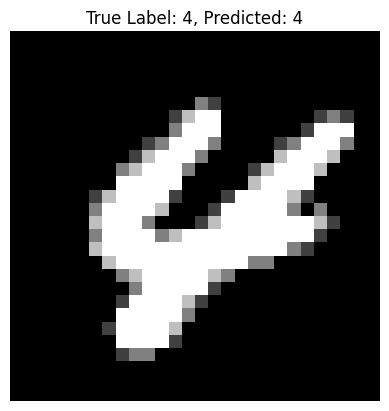

In [ ]:
import matplotlib.pyplot as plt

def get_random_test_item(dataset):
    # Convert dataset to a list of batches and take one batch
    for batch in dataset.take(1):
        images, labels = batch
        # Select a random index from the batch
        random_idx = np.random.randint(0, images.shape[0])
        image = images[random_idx]
        label = labels[random_idx]
        return image, label

# Get a random test image and label
random_image, true_label = get_random_test_item(mnist_test)

# Reshape image for prediction (model expects a batch, so add batch dimension)
random_image_input = tf.expand_dims(random_image, axis=0)  # Shape: (1, 28, 28)

# Make prediction
predictions = model.predict(random_image_input)
predicted_class = np.argmax(predictions[0])  # Get index of highest probability

# Print results
print(f"True class: {true_label.numpy()}")
print(f"Predicted class: {predicted_class}")

# Visualize the image
plt.imshow(random_image.numpy().reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label.numpy()}, Predicted: {predicted_class}")
plt.axis('off')
plt.show()